In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
# import data

agreements = pd.read_csv('Data Preprocessing/fta_clean.csv')
unsupervised = pd.read_csv('Data Preprocessing/unsupervised.csv', index_col='Identifier')

agreements['Date signed'] = pd.to_datetime(agreements['Date signed']).dt.year

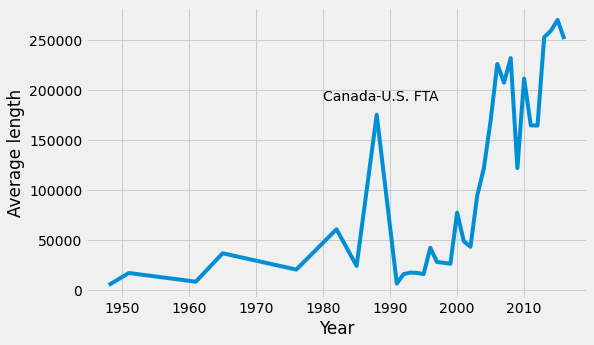

In [3]:
# Plot for average length of agreements

plt.figure(figsize=(8,5))
plt.xlabel('Year')
plt.ylabel('Average length')
plt.plot(agreements.groupby('Date signed')['Total words'].mean())
plt.text(1980,190000,'Canada-U.S. FTA')
plt.savefig('length.png', bbox_inches = 'tight')

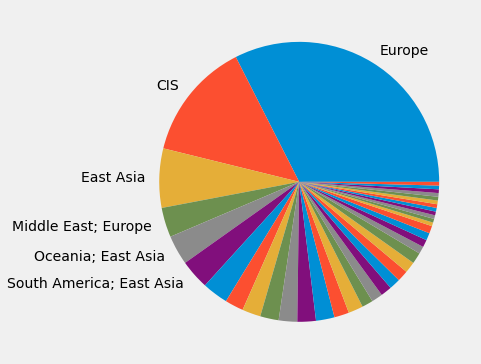

In [4]:
# Plot for composition of agreements

plt.figure(figsize=(10,6))
plt.pie(agreements['Region'].value_counts(), labels=['CIS' if i == 'Commonwealth of Independent States (CIS)' else i if n < 6 else '' for (n, i) in enumerate(agreements['Region'].value_counts().index)])
plt.savefig('composition.png', bbox_inches = 'tight')

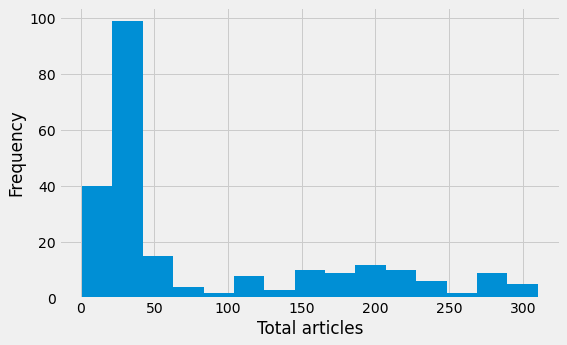

In [5]:
# Plot for distribution of total articles

plt.figure(figsize=(8,5))
plt.hist(agreements['Total articles'], bins=15)
plt.ylabel('Frequency')
plt.xlabel('Total articles')
plt.show()

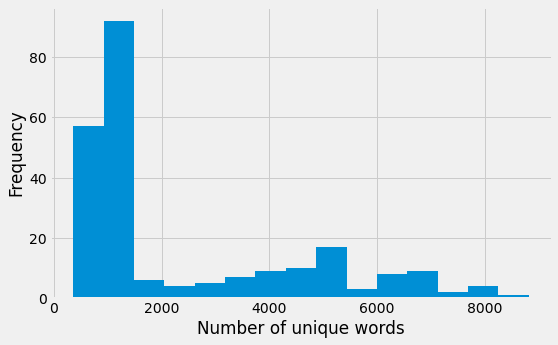

In [6]:
# Plot for distribution of unique words

plt.figure(figsize=(8,5))
plt.hist(agreements['Number of unique words'], bins=15)
plt.ylabel('Frequency')
plt.xlabel('Number of unique words')
plt.savefig('unique words.png', bbox_inches = 'tight')

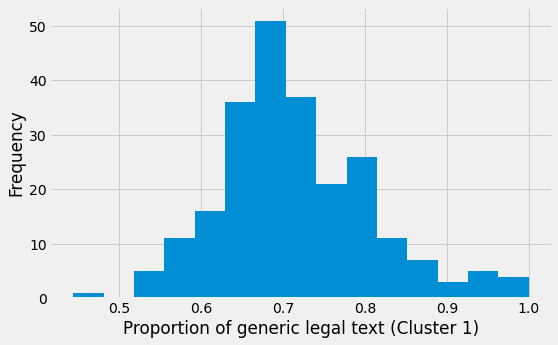

In [7]:
# Plot for distribution of generic legal text

plt.figure(figsize=(8,5))
plt.hist(unsupervised['Class 0'], bins=15)
plt.xlabel('Proportion of generic legal text (Cluster 1)')
plt.ylabel('Frequency')
plt.savefig('topic modelling.png', bbox_inches = 'tight')

In [8]:
# Summary statistics

agreements[['Total articles', 'Total words', 'Number of unique words']].agg(['min', 'max', 'mean', 'median', lambda x: x.quantile(0.75), lambda x: x.quantile(0.25), 'std'])

,Total articles,Total words,Number of unique words
min,1.000000,4852.000000,362.000000
max,310.000000,491979.000000,8815.000000
mean,87.085470,97372.940171,2383.867521
median,41.000000,31720.500000,1189.500000
<lambda>,155.000000,171747.500000,4131.500000
<lambda>,27.000000,19364.000000,937.250000
std,85.703659,120630.842688,2165.373663
